In [70]:
import pandas as pd
import numpy as np
import pickle

from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

import warnings  
warnings.filterwarnings("ignore")

In [2]:
df1=pd.DataFrame(pd.read_csv(r'G:\Python Data Science\Projects\Machine Predictive Maintenance Classification\Dataset\predictive_maintenance.csv'))
df1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


# Feature Selection

In [3]:
df=df1.drop(['UDI','Product ID'],axis=1)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


# EDA

<AxesSubplot:>

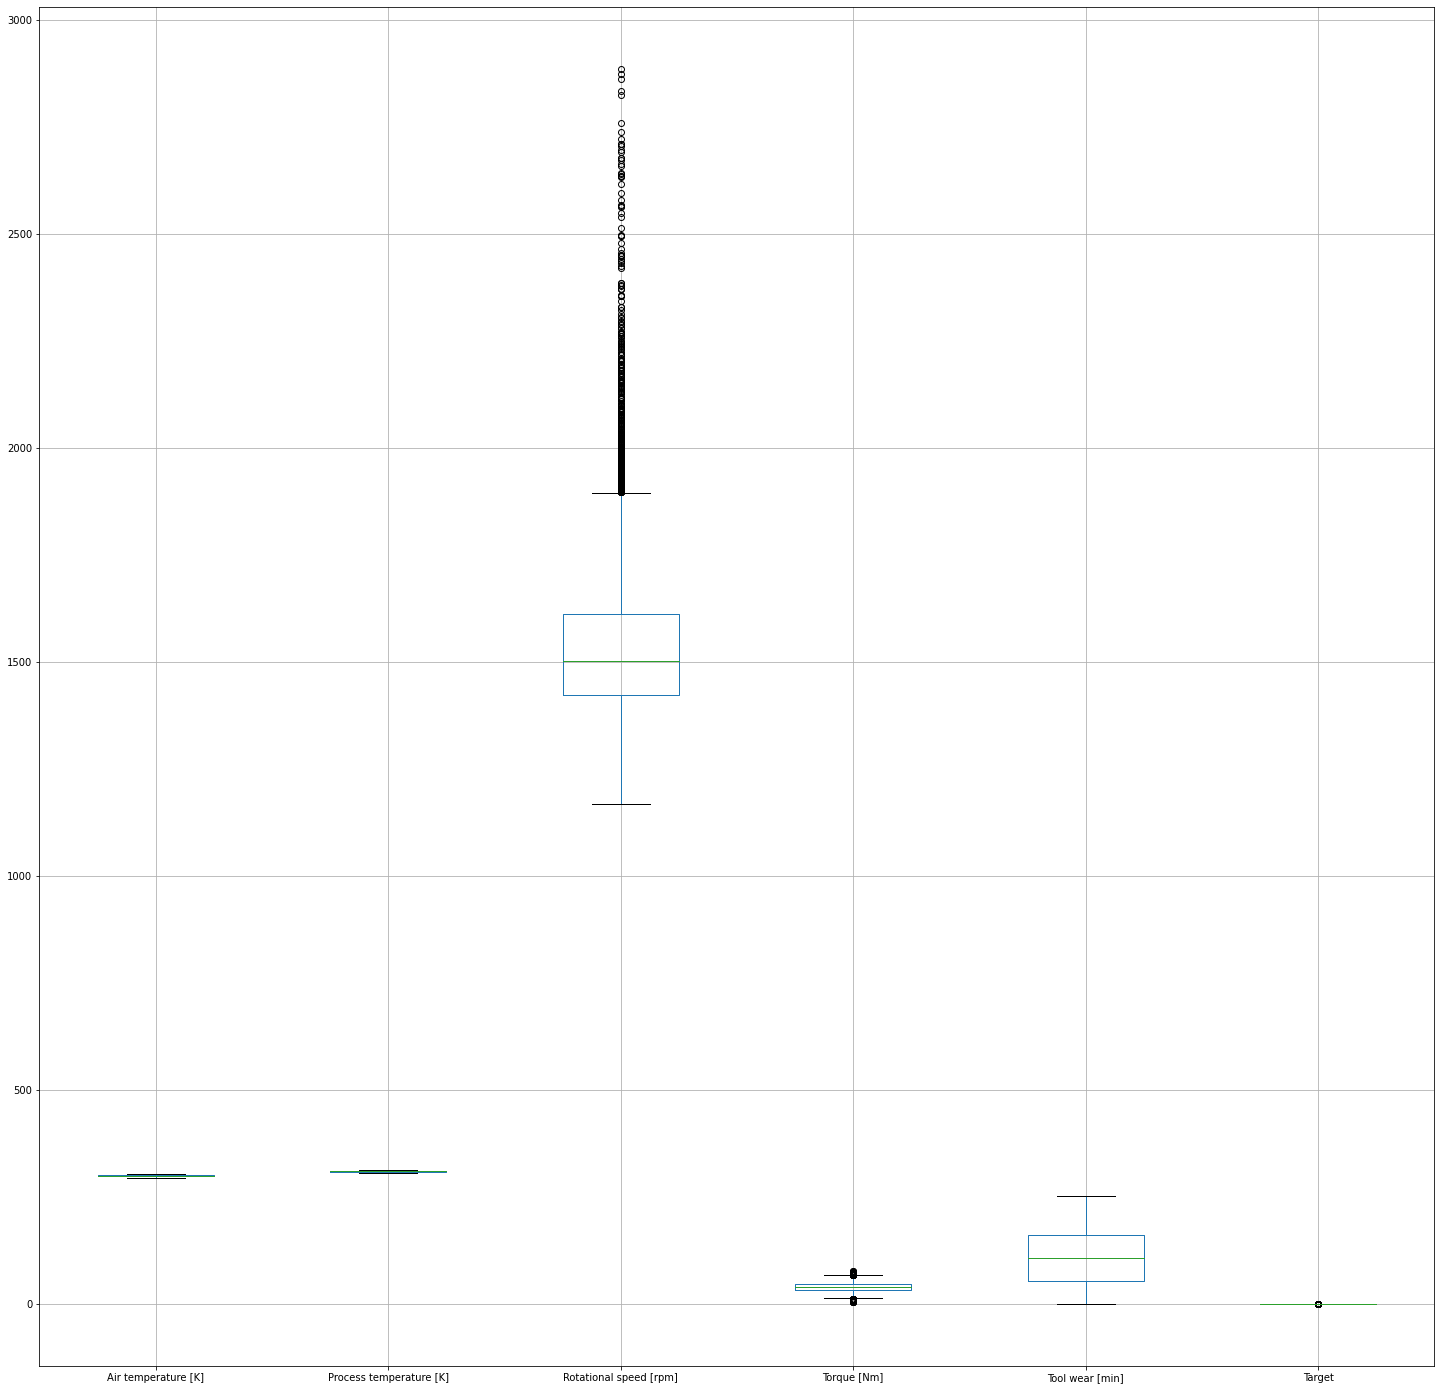

In [4]:
plt.figure(figsize=(25,25))
df.boxplot()

In [5]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
df.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


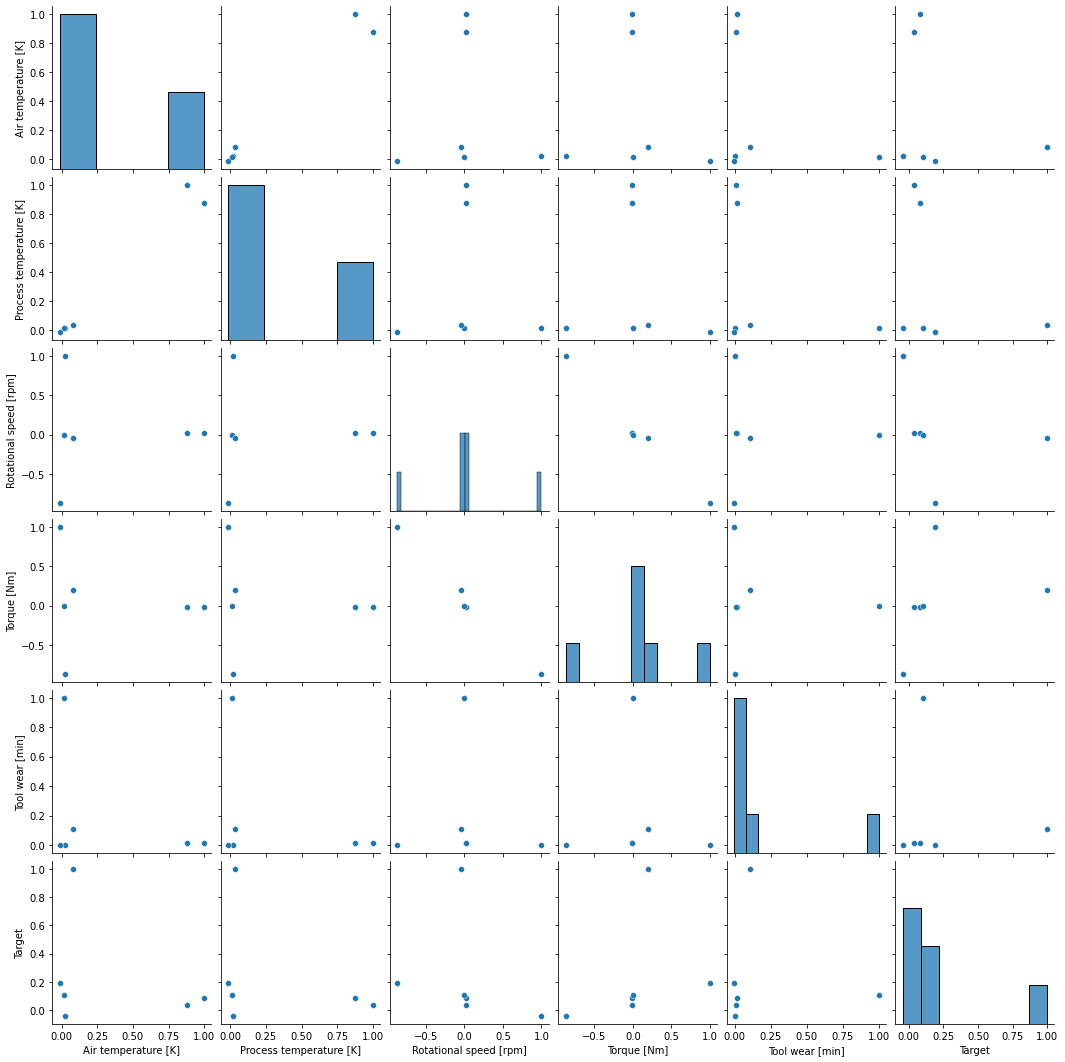

In [7]:
sns.pairplot(df.corr())

<AxesSubplot:>

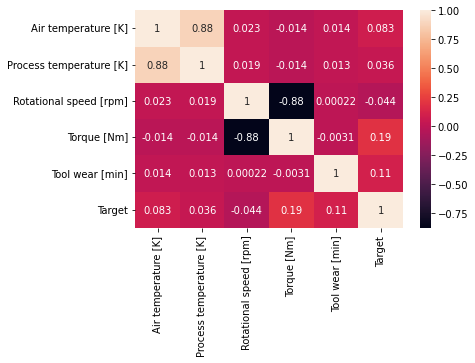

In [8]:

sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

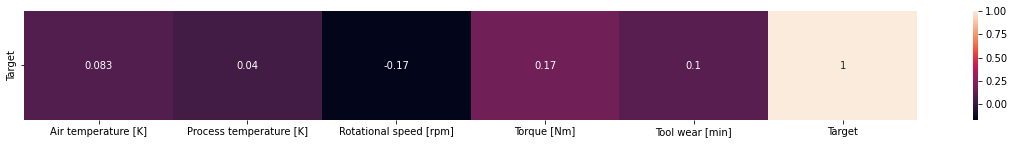

In [9]:
plt.figure(figsize=(20,2))
sns.heatmap(df.corr(method='spearman').tail(1),annot=True)

In [10]:
# # Rotational speed [rpm]	Torque [Nm]	Tool wear [min]	Target
# # sns.kdeplot(df['Air temperature [K]'])
# # sns.kdeplot(df['Process temperature [K]'])
# # sns.kdeplot(df['Rotational speed [rpm]'])
# # sns.kdeplot(df['Torque [Nm]'])
# # sns.kdeplot(df['Tool wear [min]'])
# # sns.kdeplot(df['Target'])
# fig,ax=plt.subplots(2,2,figsize=(25,25))
# ax[0,1]=ax.imshow(sns.kdeplot(df['Air temperature [K]']))
# # for idx,img in enumerate(df.columns):
# #     ax[idx].imshow(img)
# # #     y=classes_ts[idx]
# #     ax[idx].title.set_text(y)

# Reducing Outliers

# 1.Rotational speed [rpm]

In [11]:
outlier_df=df.drop(['Type','Failure Type'],axis=1)
feature_1=df['Type']
Failure_Type=df['Failure Type']
features=outlier_df.columns
features


def reducing_outliers(feature):
    q1=df[feature].quantile(0.25)
    q2=df[feature].quantile(0.5)
    q3=df[feature].quantile(0.75)
    iqr=q3-q1

    up_tl=q3+(iqr*1.5)
    lo_tl=q1-(iqr+1.5)
    print('Upper Tail:-',up_tl)
    print('Lower Tail:-',lo_tl)
    sns.boxplot(df[feature])

    df[feature].loc[df[feature]>up_tl]=df[feature].median()

Upper Tail:- 306.29999999999995
Lower Tail:- 293.6
Upper Tail:- 314.55000000000007
Lower Tail:- 305.0
Upper Tail:- 1895.5
Lower Tail:- 1232.5
Upper Tail:- 67.19999999999999
Lower Tail:- 18.10000000000001
Upper Tail:- 325.5
Lower Tail:- -57.5
Upper Tail:- 0.0
Lower Tail:- -1.5


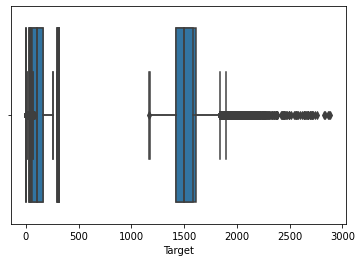

In [12]:
for i in features:
    outliers=reducing_outliers(i)
    sns.boxplot(df[i])

Upper Tail:- 1838.0
Lower Tail:- 1255.5


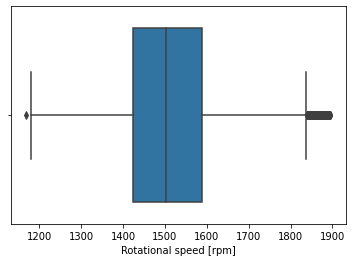

In [13]:
q1=df['Rotational speed [rpm]'].quantile(0.25)
q2=df['Rotational speed [rpm]'].quantile(0.5)
q3=df['Rotational speed [rpm]'].quantile(0.75)
iqr=q3-q1

up_tl=q3+(iqr*1.5)
lo_tl=q1-(iqr+1.5)
print('Upper Tail:-',up_tl)
print('Lower Tail:-',lo_tl)
sns.boxplot(df['Rotational speed [rpm]'])

df['Rotational speed [rpm]'].loc[df['Rotational speed [rpm]']>up_tl]=df['Rotational speed [rpm]'].median()

<AxesSubplot:xlabel='Rotational speed [rpm]'>

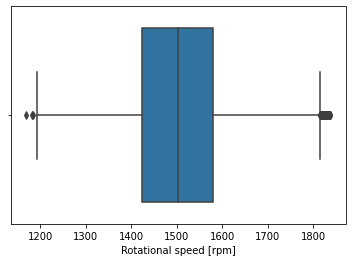

In [14]:
sns.boxplot(df['Rotational speed [rpm]'])

# 2.Torque

Upper Tail:- 66.7
Lower Tail:- 18.300000000000004


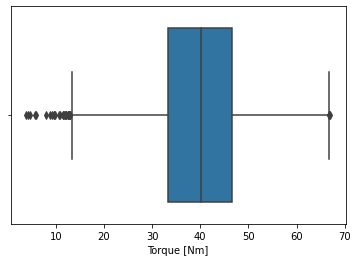

In [15]:
q1=df['Torque [Nm]'].quantile(0.25)
q2=df['Torque [Nm]'].quantile(0.5)
q3=df['Torque [Nm]'].quantile(0.75)
iqr=q3-q1

up_tl=q3+(iqr*1.5)
lo_tl=q1-(iqr+1.5)
print('Upper Tail:-',up_tl)
print('Lower Tail:-',lo_tl)
sns.boxplot(df['Torque [Nm]'])

df['Torque [Nm]'].loc[df['Torque [Nm]']>up_tl]=df['Torque [Nm]'].median()
df['Torque [Nm]'].loc[df['Torque [Nm]']<lo_tl]=df['Torque [Nm]'].median()

<AxesSubplot:xlabel='Torque [Nm]'>

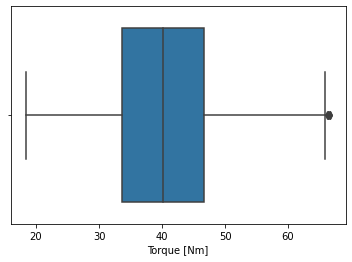

In [16]:
sns.boxplot(df['Torque [Nm]'])

<AxesSubplot:>

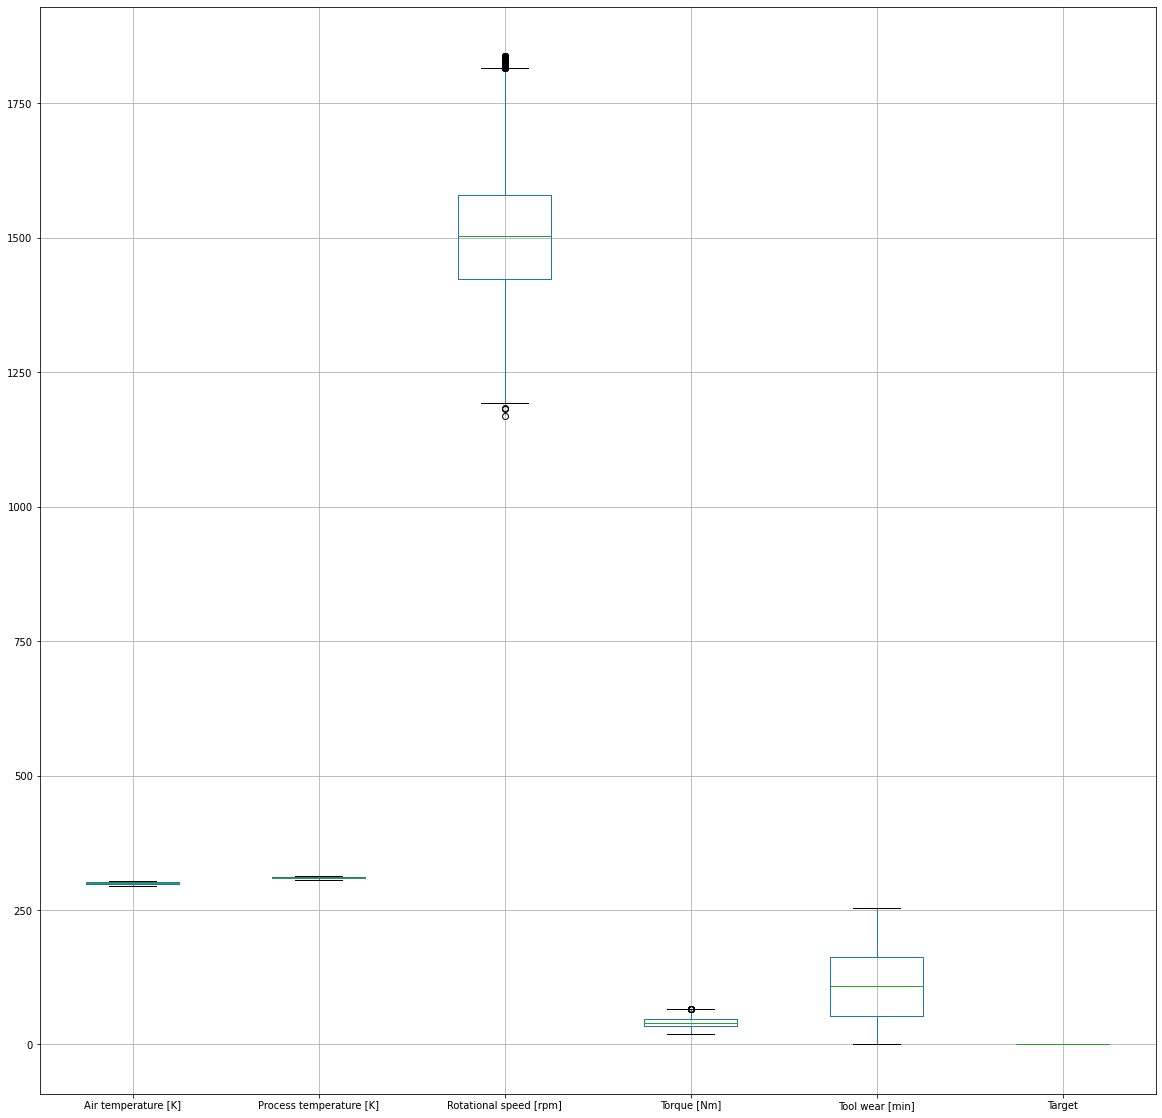

In [17]:
plt.figure(figsize=(20,20))
df.boxplot()

# Encoding the columns

# One hot Encoding

In [18]:
# encod=pd.get_dummies()
typ=pd.get_dummies(df['Type'],prefix='Type')
typ


,Type_H,Type_L,Type_M
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,1,0,0
9997,0,0,1
9998,1,0,0


# Label Encoding

In [19]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [75]:
lblenco=LabelEncoder()
y=lblenco.fit_transform(df['Failure Type'])
y=pd.DataFrame(y,columns=['Target'])
y.value_counts()

Target
1         9652
0          112
3           95
2           78
5           45
4           18
dtype: int64

# Feature Engineering

In [21]:
z=df.drop(['Target','Failure Type','Type'],axis=1)
# y=df['Failure Type']
x=pd.concat((z,typ),axis=1)
x

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1
9996,298.9,308.4,1632,31.8,17,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1
9998,299.0,308.7,1408,48.5,25,1,0,0


<AxesSubplot:>

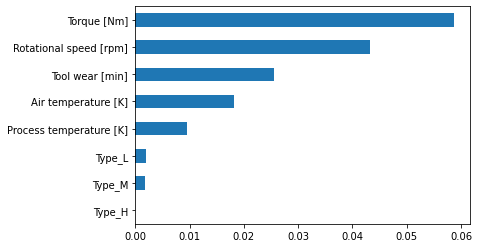

In [22]:
array2=mutual_info_classif(x,y)
s2=pd.Series(array2,index=x.columns)
s2.sort_values().plot(kind='barh')

<AxesSubplot:>

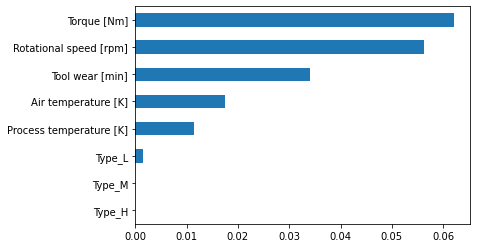

In [23]:
array2=mutual_info_regression(x,y)
s2=pd.Series(array2,index=x.columns)
s2.sort_values().plot(kind='barh')

# Pearson

<AxesSubplot:>

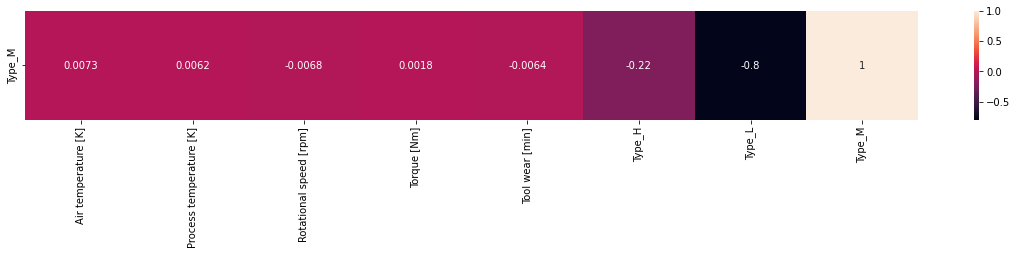

In [24]:
plt.figure(figsize=(20,2))
sns.heatmap(x.corr(method='spearman').tail(1),annot=True)

<AxesSubplot:>

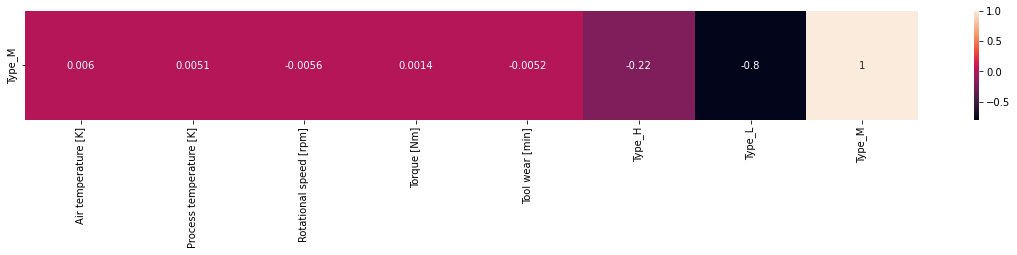

In [25]:
plt.figure(figsize=(20,2))
sns.heatmap(x.corr(method='kendall').tail(1),annot=True)

# Train Test SPlit

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=24,stratify=y)
x_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
643,297.8,309.4,1495,36.5,132,0,0,1
6976,300.6,310.9,1344,46.7,133,0,1,0
9009,297.3,307.9,1579,34.4,193,0,1,0
6229,301.3,310.9,1503,40.1,143,0,1,0
1213,296.8,307.8,1551,38.9,112,0,0,1
...,...,...,...,...,...,...,...,...
6216,301.1,310.8,1724,27.5,101,0,1,0
6482,300.6,309.9,1480,43.7,153,0,1,0
7874,300.7,312.3,1548,37.9,58,0,1,0
544,297.5,309.4,1831,26.6,105,0,0,1


# Model Building

# Desicion Tree Classifier using entropy

In [27]:
dtcen=DecisionTreeClassifier(criterion='entropy')
dtcen_model=dtcen.fit(x_train,y_train)
dtcen_model

print('*'*40+'Testing Data Accuracy'+'*'*40)
dtcen_y_pred_test=dtcen_model.predict(x_test)
dtcen_cnf_mtx=confusion_matrix(y_test,dtcen_y_pred_test)
print('Confusion Matrix:-\n',dtcen_cnf_mtx)
dtcen_acc_scc_test=accuracy_score(y_test,dtcen_y_pred_test)
print('Accuracy Score:-',dtcen_acc_scc_test)
dtcen_cls_rpt=classification_report(y_test,dtcen_y_pred_test)
print('Classification Report:-\n',dtcen_cls_rpt)

print('*'*40+'Training Data Accuracy'+'*'*40)
dtcen_y_pred_train=dtcen_model.predict(x_train)
dtcen_cnf_mtx=confusion_matrix(y_train,dtcen_y_pred_train)
print('Confusion Matrix:-\n',dtcen_cnf_mtx)
dtcen_acc_scc_train=accuracy_score(y_train,dtcen_y_pred_train)
print('Accuracy Score:-',dtcen_acc_scc_train)
dtcen_cls_rpt=classification_report(y_train,dtcen_y_pred_train)
print('Classification Report:-\n',dtcen_cls_rpt)

****************************************Testing Data Accuracy****************************************
Confusion Matrix:-
 [[  25    3    0    0    0    0]
 [   5 2374    9    8    5   12]
 [   1   10    8    1    0    0]
 [   0   10    1   13    0    0]
 [   0    4    0    0    0    0]
 [   0   11    0    0    0    0]]
Accuracy Score:- 0.968
Classification Report:-
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.98      0.98      0.98      2413
           2       0.44      0.40      0.42        20
           3       0.59      0.54      0.57        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2500
   macro avg       0.47      0.47      0.47      2500
weighted avg       0.97      0.97      0.97      2500

****************************************Training Data Accuracy**************************

# Decission Tree Classifier with gini index

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=24,stratify=y)
x_train

dtcgn=DecisionTreeClassifier(criterion='gini')
dtcgn_model=dtcgn.fit(x_train,y_train)
dtcgn_model

print('*'*40+'Testing Data Accuracy'+'*'*40)

dtcgn_y_pred_test=dtcgn_model.predict(x_test)
dtcgn_cnf_mtx=confusion_matrix(y_test,dtcgn_y_pred_test)
print('Confusion Matrix:-\n',dtcgn_cnf_mtx)
dtcgn_acc_scc_test=accuracy_score(y_test,dtcgn_y_pred_test)
print('Accuracy Score:-',dtcgn_acc_scc_test)
dtcgn_cls_rpt=classification_report(y_test,dtcgn_y_pred_test)
print('Classification Report:-\n',dtcgn_cls_rpt)

print('*'*40+'Training Data Accuracy'+'*'*40)

dtcgn_y_pred_train=dtcgn_model.predict(x_train)
dtcgn_cnf_mtx=confusion_matrix(y_train,dtcgn_y_pred_train)
print('Confusion Matrix:-\n',dtcgn_cnf_mtx)
dtcgn_acc_scc_train=accuracy_score(y_train,dtcgn_y_pred_train)
print('Accuracy Score:-',dtcgn_acc_scc_train)
dtcgn_cls_rpt=classification_report(y_train,dtcgn_y_pred_train)
print('Classification Report:-\n',dtcgn_cls_rpt)

****************************************Testing Data Accuracy****************************************
Confusion Matrix:-
 [[  25    2    1    0    0    0]
 [   6 2383    5    9    5    5]
 [   1    8   10    0    0    1]
 [   0    7    1   16    0    0]
 [   0    4    0    0    0    0]
 [   0   10    0    0    0    1]]
Accuracy Score:- 0.974
Classification Report:-
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.99      0.99      0.99      2413
           2       0.59      0.50      0.54        20
           3       0.64      0.67      0.65        24
           4       0.00      0.00      0.00         4
           5       0.14      0.09      0.11        11

    accuracy                           0.97      2500
   macro avg       0.52      0.52      0.52      2500
weighted avg       0.97      0.97      0.97      2500

****************************************Training Data Accuracy**************************

# Randon Forest Classifier

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=24,stratify=y)
x_train

rfc=RandomForestClassifier(criterion='entropy')
rfc_model=rfc.fit(x_train,y_train)
rfc_model

print('*'*40+'Testing Data Accuracy'+'*'*40)

rfc_y_pred_test=rfc_model.predict(x_test)
rfc_cnf_mtx=confusion_matrix(y_test,rfc_y_pred_test)
print('Confusion Matrix:-\n',rfc_cnf_mtx)
rfc_acc_scc_test=accuracy_score(y_test,rfc_y_pred_test)
print('Accuracy Score:-',rfc_acc_scc_test)
rfc_cls_rpt=classification_report(y_test,rfc_y_pred_test)
print('Classification Report:-\n',rfc_cls_rpt)

print('*'*40+'Training Data Accuracy'+'*'*40)

rfc_y_pred_train=rfc_model.predict(x_train)
rfc_cnf_mtx=confusion_matrix(y_train,rfc_y_pred_train)
print('Confusion Matrix:-\n',rfc_cnf_mtx)
rfc_acc_scc_train=accuracy_score(y_train,rfc_y_pred_train)
print('Accuracy Score:-',rfc_acc_scc_train)
rfc_cls_rpt=classification_report(y_train,rfc_y_pred_train)
print('Classification Report:-\n',rfc_cls_rpt)

****************************************Testing Data Accuracy****************************************
Confusion Matrix:-
 [[  13   15    0    0    0    0]
 [   3 2410    0    0    0    0]
 [   0   12    8    0    0    0]
 [   0   18    0    6    0    0]
 [   0    4    0    0    0    0]
 [   0   11    0    0    0    0]]
Accuracy Score:- 0.9748
Classification Report:-
               precision    recall  f1-score   support

           0       0.81      0.46      0.59        28
           1       0.98      1.00      0.99      2413
           2       1.00      0.40      0.57        20
           3       1.00      0.25      0.40        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2500
   macro avg       0.63      0.35      0.42      2500
weighted avg       0.97      0.97      0.97      2500

****************************************Training Data Accuracy*************************

# KNN Classifier

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=24,stratify=y)
x_train

knn=KNeighborsClassifier(n_neighbors=3)
knn_model=knn.fit(x_train,y_train)
knn_model
print('*'*40+'Testing Data Accuracy'+'*'*40)
knn_y_pred_test=knn_model.predict(x_test)
knn_cnf_mtx=confusion_matrix(y_test,knn_y_pred_test)
print('Confusion Matrix:-\n',knn_cnf_mtx)
knn_acc_scc_test=accuracy_score(y_test,knn_y_pred_test)
print('Accuracy Score:-',knn_acc_scc_test)
knn_cls_rpt=classification_report(y_test,knn_y_pred_test)
print('Classification Report:-\n',knn_cls_rpt)

print('*'*40+'Training  Data Accuracy'+'*'*40)
knn_y_pred_train=knn_model.predict(x_train)
knn_cnf_mtx=confusion_matrix(y_train,knn_y_pred_train)
print('Confusion Matrix:-\n',knn_cnf_mtx)
knn_acc_scc_train=accuracy_score(y_train,knn_y_pred_train)
print('Accuracy Score:-',knn_acc_scc_train)
knn_cls_rpt=classification_report(y_train,knn_y_pred_train)
print('Classification Report:-\n',knn_cls_rpt)

****************************************Testing Data Accuracy****************************************
Confusion Matrix:-
 [[   1   27    0    0    0    0]
 [   7 2401    2    3    0    0]
 [   0   13    7    0    0    0]
 [   0   22    1    1    0    0]
 [   0    4    0    0    0    0]
 [   0   11    0    0    0    0]]
Accuracy Score:- 0.964
Classification Report:-
               precision    recall  f1-score   support

           0       0.12      0.04      0.06        28
           1       0.97      1.00      0.98      2413
           2       0.70      0.35      0.47        20
           3       0.25      0.04      0.07        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        11

    accuracy                           0.96      2500
   macro avg       0.34      0.24      0.26      2500
weighted avg       0.94      0.96      0.95      2500

****************************************Training  Data Accuracy*************************

# Adaboost

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=24,stratify=y)
x_train

adb=AdaBoostClassifier()
adb_model=adb.fit(x_train,y_train)
adb_model
print('*'*40+'Testing Data Accuracy'+'*'*40)
adb_y_pred_test=adb_model.predict(x_test)
adb_cnf_mtx=confusion_matrix(y_test,adb_y_pred_test)
print('Confusion Matrix:-\n',adb_cnf_mtx)
adb_acc_scc_test=accuracy_score(y_test,adb_y_pred_test)
print('Accuracy Score:-',adb_acc_scc_test)
adb_cls_rpt=classification_report(y_test,adb_y_pred_test)
print('Classification Report:-\n',adb_cls_rpt)

print('*'*40+'Training  Data Accuracy'+'*'*40)
adb_y_pred_train=adb_model.predict(x_train)
adb_cnf_mtx=confusion_matrix(y_train,adb_y_pred_train)
print('Confusion Matrix:-\n',adb_cnf_mtx)
adb_acc_scc_train=accuracy_score(y_train,adb_y_pred_train)
print('Accuracy Score:-',adb_acc_scc_train)
adb_cls_rpt=classification_report(y_train,adb_y_pred_train)
print('Classification Report:-\n',adb_cls_rpt)

****************************************Testing Data Accuracy****************************************
Confusion Matrix:-
 [[   0   28    0    0    0    0]
 [   0 1753    0    0  660    0]
 [   0   20    0    0    0    0]
 [   0   24    0    0    0    0]
 [   0    4    0    0    0    0]
 [   0   11    0    0    0    0]]
Accuracy Score:- 0.7012
Classification Report:-
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.95      0.73      0.82      2413
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        11

    accuracy                           0.70      2500
   macro avg       0.16      0.12      0.14      2500
weighted avg       0.92      0.70      0.80      2500

****************************************Training  Data Accuracy************************

# Kmeans Clsutering

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=24,stratify=y)
x_train

kmc=KMeans(n_clusters=2)
kmc_model=kmc.fit(x_train,y_train)
kmc_model
print('*'*40+'Testing Data Accuracy'+'*'*40)
kmc_y_pred_test=kmc_model.predict(x_test)
kmc_cnf_mtx=confusion_matrix(y_test,kmc_y_pred_test)
print('Confusion Matrix:-\n',kmc_cnf_mtx)
kmc_acc_scc_test=accuracy_score(y_test,kmc_y_pred_test)
print('Accuracy Score:-',kmc_acc_scc_test)
kmc_cls_rpt=classification_report(y_test,kmc_y_pred_test)
print('Classification Report:-\n',kmc_cls_rpt)

print('*'*40+'Training  Data Accuracy'+'*'*40)
kmc_y_pred_train=kmc_model.predict(x_train)
kmc_cnf_mtx=confusion_matrix(y_train,kmc_y_pred_train)
print('Confusion Matrix:-\n',kmc_cnf_mtx)
kmc_acc_scc_train=accuracy_score(y_train,kmc_y_pred_train)
print('Accuracy Score:-',kmc_acc_scc_train)
kmc_cls_rpt=classification_report(y_train,kmc_y_pred_train)
print('Classification Report:-\n',kmc_cls_rpt)

****************************************Testing Data Accuracy****************************************
Confusion Matrix:-
 [[   0   28    0    0    0    0]
 [ 850 1563    0    0    0    0]
 [   0   20    0    0    0    0]
 [   0   24    0    0    0    0]
 [   1    3    0    0    0    0]
 [   3    8    0    0    0    0]]
Accuracy Score:- 0.6252
Classification Report:-
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.95      0.65      0.77      2413
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        11

    accuracy                           0.63      2500
   macro avg       0.16      0.11      0.13      2500
weighted avg       0.92      0.63      0.74      2500

****************************************Training  Data Accuracy************************

# Naive Bayse Classifier

# 1.GaussianNB

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=24,stratify=y)
x_train

gnb=GaussianNB()
gnb_model=gnb.fit(x_train,y_train)
gnb_model
print('*'*40+'Testing Data Accuracy'+'*'*40)
gnb_y_pred_test=gnb_model.predict(x_test)
gnb_cnf_mtx=confusion_matrix(y_test,gnb_y_pred_test)
print('Confusion Matrix:-\n',gnb_cnf_mtx)
gnb_acc_scc_test=accuracy_score(y_test,gnb_y_pred_test)
print('Accuracy Score:-',gnb_acc_scc_test)
gnb_cls_rpt=classification_report(y_test,gnb_y_pred_test)
print('Classification Report:-\n',gnb_cls_rpt)

print('*'*40+'Training  Data Accuracy'+'*'*40)
gnb_y_pred_train=gnb_model.predict(x_train)
gnb_cnf_mtx=confusion_matrix(y_train,gnb_y_pred_train)
print('Confusion Matrix:-\n',gnb_cnf_mtx)
gnb_acc_scc_train=accuracy_score(y_train,gnb_y_pred_train)
print('Accuracy Score:-',gnb_acc_scc_train)
gnb_cls_rpt=classification_report(y_train,gnb_y_pred_train)
print('Classification Report:-\n',gnb_cls_rpt)

****************************************Testing Data Accuracy****************************************
Confusion Matrix:-
 [[  21    7    0    0    0    0]
 [  31 2345   37    0    0    0]
 [   0    2   18    0    0    0]
 [   0   22    2    0    0    0]
 [   1    3    0    0    0    0]
 [   0   10    1    0    0    0]]
Accuracy Score:- 0.9536
Classification Report:-
               precision    recall  f1-score   support

           0       0.40      0.75      0.52        28
           1       0.98      0.97      0.98      2413
           2       0.31      0.90      0.46        20
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        11

    accuracy                           0.95      2500
   macro avg       0.28      0.44      0.33      2500
weighted avg       0.95      0.95      0.95      2500

****************************************Training  Data Accuracy************************

# 2.MultinomialNB

In [34]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=34,stratify=y)
x_train

mnb=MultinomialNB()
mnb_model=mnb.fit(x_train,y_train)
mnb_model
print('*'*40+'Testing Data Accuracy'+'*'*40)
mnb_y_pred_test=mnb_model.predict(x_test)
mnb_cnf_mtx=confusion_matrix(y_test,mnb_y_pred_test)
print('Confusion Matrix:-\n',mnb_cnf_mtx)
mnb_acc_scc_test=accuracy_score(y_test,mnb_y_pred_test)
print('Accuracy Score:-',mnb_acc_scc_test)
mnb_cls_rpt=classification_report(y_test,mnb_y_pred_test)
print('Classification Report:-\n',mnb_cls_rpt)
# # print(i,mnb_acc_scc_test)
# l1.append(mnb_acc_scc_test)

print('*'*40+'Training  Data Accuracy'+'*'*40)
mnb_y_pred_train=mnb_model.predict(x_train)
mnb_cnf_mtx=confusion_matrix(y_train,mnb_y_pred_train)
print('Confusion Matrix:-\n',mnb_cnf_mtx)
mnb_acc_scc_train=accuracy_score(y_train,mnb_y_pred_train)
print('Accuracy Score:-',mnb_acc_scc_train)
mnb_cls_rpt=classification_report(y_train,mnb_y_pred_train)
print('Classification Report:-\n',mnb_cls_rpt)

****************************************Testing Data Accuracy****************************************
Confusion Matrix:-
 [[   6    4    5   13    0    0]
 [  94 1576  114  151   95  383]
 [   0    0   19    0    0    0]
 [   5    7    5    5    0    2]
 [   0    2    0    1    0    2]
 [   0    0    2    0    0    9]]
Accuracy Score:- 0.646
Classification Report:-
               precision    recall  f1-score   support

           0       0.06      0.21      0.09        28
           1       0.99      0.65      0.79      2413
           2       0.13      1.00      0.23        19
           3       0.03      0.21      0.05        24
           4       0.00      0.00      0.00         5
           5       0.02      0.82      0.04        11

    accuracy                           0.65      2500
   macro avg       0.21      0.48      0.20      2500
weighted avg       0.96      0.65      0.76      2500

****************************************Training  Data Accuracy*************************

# 3.BernoulliNB

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=24,stratify=y)
x_train

bnb=BernoulliNB()
bnb_model=bnb.fit(x_train,y_train)
bnb_model
print('*'*40+'Testing Data Accuracy'+'*'*40)
bnb_y_pred_test=bnb_model.predict(x_test)
bnb_cnf_mtx=confusion_matrix(y_test,bnb_y_pred_test)
print('Confusion Matrix:-\n',bnb_cnf_mtx)
bnb_acc_scc_test=accuracy_score(y_test,bnb_y_pred_test)
print('Accuracy Score:-',bnb_acc_scc_test)
bnb_cls_rpt=classification_report(y_test,bnb_y_pred_test)
print('Classification Report:-\n',bnb_cls_rpt)

print('*'*40+'Training  Data Accuracy'+'*'*40)
bnb_y_pred_train=bnb_model.predict(x_train)
bnb_cnf_mtx=confusion_matrix(y_train,bnb_y_pred_train)
print('Confusion Matrix:-\n',bnb_cnf_mtx)
bnb_acc_scc_train=accuracy_score(y_train,bnb_y_pred_train)
print('Accuracy Score:-',bnb_acc_scc_train)
bnb_cls_rpt=classification_report(y_train,bnb_y_pred_train)
print('Classification Report:-\n',bnb_cls_rpt)

****************************************Testing Data Accuracy****************************************
Confusion Matrix:-
 [[   0   28    0    0    0    0]
 [   0 2413    0    0    0    0]
 [   0   20    0    0    0    0]
 [   0   24    0    0    0    0]
 [   0    4    0    0    0    0]
 [   0   11    0    0    0    0]]
Accuracy Score:- 0.9652
Classification Report:-
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.97      1.00      0.98      2413
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2500
   macro avg       0.16      0.17      0.16      2500
weighted avg       0.93      0.97      0.95      2500

****************************************Training  Data Accuracy************************

# Summery of Accuracy

In [36]:
# dtc_acc_scc_test   dtc_acc_scc_train
tr_acc_list=[dtcen_acc_scc_train,dtcgn_acc_scc_train,rfc_acc_scc_train,knn_acc_scc_train,
             kmc_acc_scc_train,adb_acc_scc_train,gnb_acc_scc_train,mnb_acc_scc_train,bnb_acc_scc_train]
ts_acc_list=[dtcen_acc_scc_test,dtcgn_acc_scc_test,rfc_acc_scc_test,knn_acc_scc_test,
             kmc_acc_scc_test,adb_acc_scc_test,gnb_acc_scc_test,mnb_acc_scc_test,bnb_acc_scc_test]
# acc_data=np.array([tr_acc_list,ts_acc_list])
ind=['Decision Tree Entropy','Decision Tree Gini','Random Forest','KNN','KMeans Cluster','Adaboost','GausianNB',
      'MultinomialNB','BernoulliNB']
col=['Training Accuray','Testing Accuracy']
# tr_acc=pd.DataFrame(acc_data,columns=['Training Accuray'],index=ind)
acc_sum=pd.DataFrame({'Training Accuray':tr_acc_list,'Testing Accuracy':ts_acc_list},index=ind)
acc_sum

,Training Accuray,Testing Accuracy
Decision Tree Entropy,1.000000,0.9680
Decision Tree Gini,1.000000,0.9740
Random Forest,0.999867,0.9748
KNN,0.971600,0.9640
KMeans Cluster,0.617067,0.6252
Adaboost,0.707733,0.7012
GausianNB,0.950933,0.9536
MultinomialNB,0.619467,0.6460
BernoulliNB,0.965200,0.9652


<AxesSubplot:>

<Figure size 2880x2880 with 0 Axes>

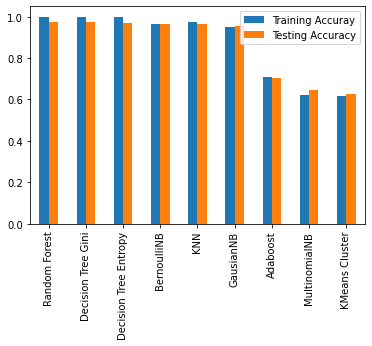

In [37]:
amc=acc_sum.sort_values(by='Testing Accuracy',ascending=False)
plt.figure(figsize=(40,40))
amc.plot.bar()

<AxesSubplot:>

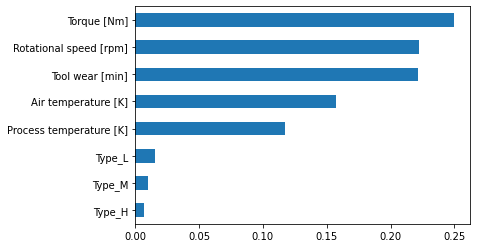

In [38]:
h=rfc.feature_importances_
s1=pd.Series(rfc.feature_importances_,index=x.columns)

s1.sort_values().plot(kind='barh')

In [39]:
# bnb=BernoulliNB()
# bnb_model=bnb.fit(x_train,y_train)
# bnb_model

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=24,stratify=y)
x_train

def Evaluation(model,model_name):
#     print('*'*110)
#     print('*'*44+f'{model_name} Evaluation'+'*'*44)
#     print('*'*110)
#     print('*'*40+f'{model_name} Test Data Accuracy'+'*'*40)
    y_pred_test=model.predict(x_test)
    cnf_mtx=confusion_matrix(y_test,y_pred_test)
#     print(f'{model_name} Confusion Matrix:-\n',cnf_mtx)
    acc_scc_test=accuracy_score(y_test,y_pred_test)
#     print(f'{model_name} Accuracy Score:-',acc_scc_test)
    cls_rpt=classification_report(y_test,y_pred_test)
#     print(f'{model_name} Classification Report:-\n',cls_rpt)

#     print('*'*40+f'{model_name} Training  Data Accuracy'+'*'*40)
    y_pred_train=model.predict(x_train)
    cnf_mtx=confusion_matrix(y_train,y_pred_train)
#     print(f'{model_name} Confusion Matrix:-\n',cnf_mtx)
    acc_scc_train=accuracy_score(y_train,y_pred_train)
#     print(f'{model_name} Accuracy Score:-',acc_scc_train)
    cls_rpt=classification_report(y_train,y_pred_train)
#     print(f' {model_name} Classification Report:-\n',cls_rpt)
    return tr_acc.append(acc_scc_train),ts_acc.append(acc_scc_test),ind.append(model_name)

In [41]:
def models():
    bnb=BernoulliNB()
    bnb_model=bnb.fit(x_train,y_train)
    tr_acc,ts_acc,ind=Evaluation(bnb_model,'BernoulliNB')
    
    knn=KNeighborsClassifier(n_neighbors=10) #KNeighborsClassifier
    knn_model=knn.fit(x_train,y_train)
    tr_acc,ts_acc,ind=Evaluation(knn_model,'KNeighborClassifier')
    
    rfc=RandomForestClassifier(criterion='entropy')
    rfc_model=rfc.fit(x_train,y_train)
    tr_acc,ts_acc,ind=Evaluation(knn_model,'Random Forest Classifier')
    
    return

In [42]:
tr_acc=[]
ts_acc=[]
ind=[]
models()
summ=pd.DataFrame({'Training Accuray':tr_acc,'Testing Accuracy':ts_acc},index=ind)
summ


,Training Accuray,Testing Accuracy
BernoulliNB,0.965200,0.9652
KNeighborClassifier,0.967333,0.9660
Random Forest Classifier,0.967333,0.9660


In [43]:
def models():
    bnb=BernoulliNB()
    bnb_model=bnb.fit(x_train,y_train)
    l1=Evaluation(bnb_model,'BernoulliNB')
    
    knn=KNeighborsClassifier(n_neighbors=4) #KNeighborsClassifier
    knn_model=knn.fit(x_train,y_train)
    l1=Evaluation(knn_model,'KNeighborClassifier')

In [48]:
tr_acc=[]
ts_acc=[]
ind=[]
models()
summ=pd.DataFrame({'Training Accuray':tr_acc,'Testing Accuracy':ts_acc},index=ind)
summ


,Training Accuray,Testing Accuracy
BernoulliNB,0.9652,0.9652
KNeighborClassifier,0.9688,0.9620


In [54]:
pickle.dump(rfc_model,open('ref_model.pkl','wb'))


In [60]:

model

RandomForestClassifier(criterion='entropy')

In [80]:
model=pickle.load(open('ref_model.pkl','rb'))
op=pd.DataFrame({'Air temperature [K]':1000000,
                 'Process temperature [K]':1,
                 'Rotational speed [rpm]':1000,
                 'Torque [Nm]':100,
                 'Tool wear [min]':1,
                 'Type_H':1,
                 'Type_L':0,
                 'Type_M':0},index=[1])
pred=model.predict(op)
pred

array([1])